In [19]:
# Load necessary libraries
library(stats)
library(vegan) # For mantel test
library(factoextra)

# Sample data
set.seed(123)
data1 <- matrix(rnorm(100), nrow=10)
data2 <- matrix(rnorm(100), nrow=10)

# Calculate distance matrices
dist_matrix1 <- as.matrix(dist(data1))
dist_matrix2 <- as.matrix(dist(data2))

# Correlation using Pearson method
pearson_correlation <- cor(as.vector(dist_matrix1), as.vector(dist_matrix2), method = "pearson")



Loading required package: ggplot2

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa


Attaching package: ‘factoextra’


The following object is masked from ‘package:agricolae’:

    hcut




In [2]:
# Correlation using Spearman method
spearman_correlation <- cor(as.vector(dist_matrix1), as.vector(dist_matrix2), method = "spearman")



In [3]:
# Mantel test for distance matrices
mantel_test <- mantel(dist_matrix1, dist_matrix2)



In [4]:
# Print results
print(paste("Pearson correlation: ", pearson_correlation))
print(paste("Spearman correlation: ", spearman_correlation))
print(mantel_test)


[1] "Pearson correlation:  0.686921189913657"
[1] "Spearman correlation:  0.276520067291516"

Mantel statistic based on Pearson's product-moment correlation 

Call:
mantel(xdis = dist_matrix1, ydis = dist_matrix2) 

Mantel statistic r: 0.01306 
      Significance: 0.476 

Upper quantiles of permutations (null model):
  90%   95% 97.5%   99% 
0.254 0.325 0.383 0.428 
Permutation: free
Number of permutations: 999



The following example is computation of correlation coefficients from two distance metrices from the dataset genedata from R package "Biobase".The geneData dataset consists of gene expression data for 500 genes across 26 samples.

In [5]:
library(ade4)
 
# use the geneData data from Biobase
  
# load the data
data(geneData, package = "Biobase")
 
#transpose to calculate distances for the samples
data <- t(geneData)

In [8]:
head(data,2)

,AFFX-MurIL2_at,AFFX-MurIL10_at,AFFX-MurIL4_at,AFFX-MurFAS_at,AFFX-BioB-5_at,AFFX-BioB-M_at,AFFX-BioB-3_at,AFFX-BioC-5_at,AFFX-BioC-3_at,AFFX-BioDn-5_at,⋯,31730_at,31731_at,31732_at,31733_at,31734_at,31735_at,31736_at,31737_at,31738_at,31739_at
A,192.7420,97.137,45.81920,22.54450,96.7875,89.0730,265.964,110.1360,43.0794,10.9187,⋯,129.8670,19.7505,24.8190,63.5760,190.533,26.7016,446.512,22.4641,299.434,253.692
B,85.7533,126.196,8.83135,3.60093,30.4380,25.8461,181.080,57.2889,16.8006,16.1789,⋯,84.4112,89.0020,26.9743,11.6784,169.962,33.1578,271.494,23.4589,233.138,183.306


In [9]:
# store different distance matrices
eu_dist  <- dist(data, method="euclidean")
fviz_dist(eu_dist, 
   gradient = list(low = "#00AFBB", mid = "white", high = "#FC4E07"))

In [ ]:
max_dist <- dist(data, method="maximum")


In [ ]:
man_dist <- dist(data, method="manhattan")


In [ ]:
can_dist <- dist(data, method="canberra")


In [ ]:
min_dist <- dist(data, method="minkowski", p=1.5)

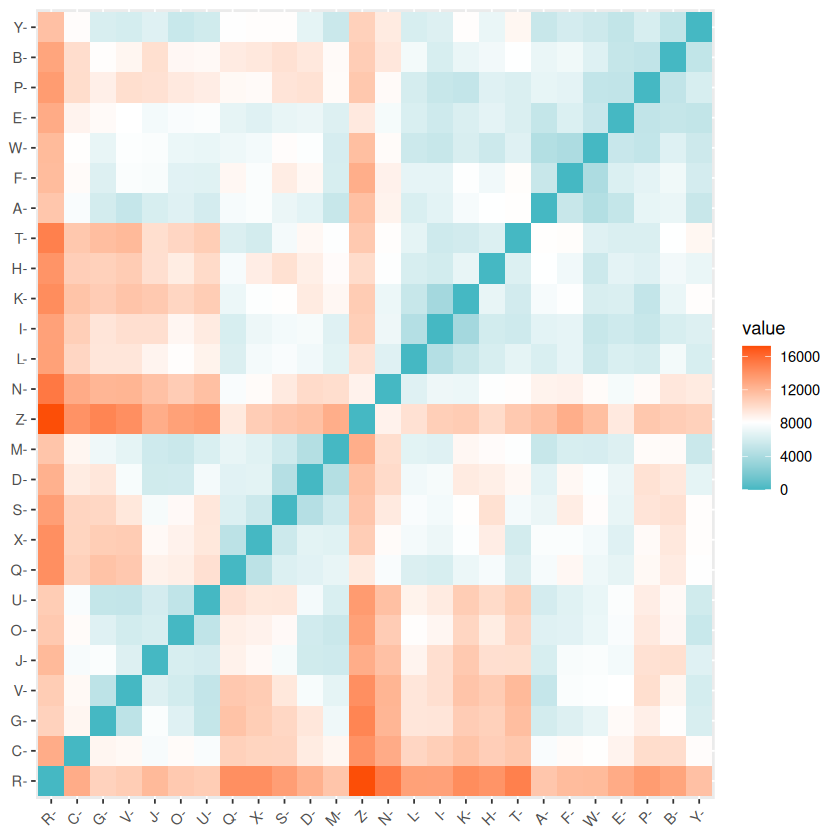

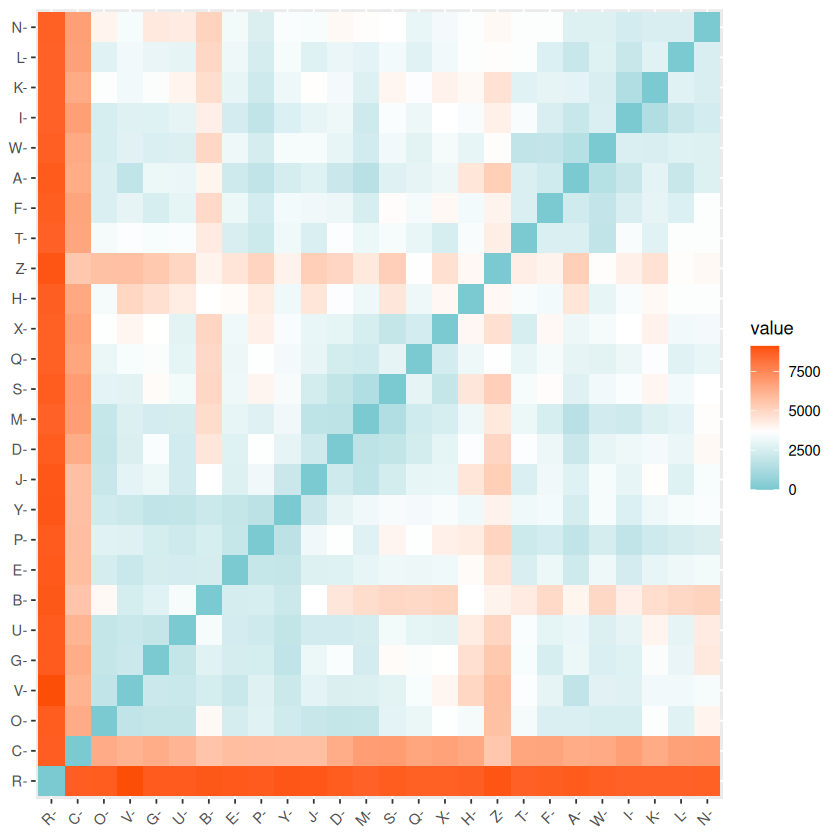

In [23]:
fviz_dist(max_dist, 
   gradient = list(low = "#00AFBB", mid = "white", high = "#FC4E07"))

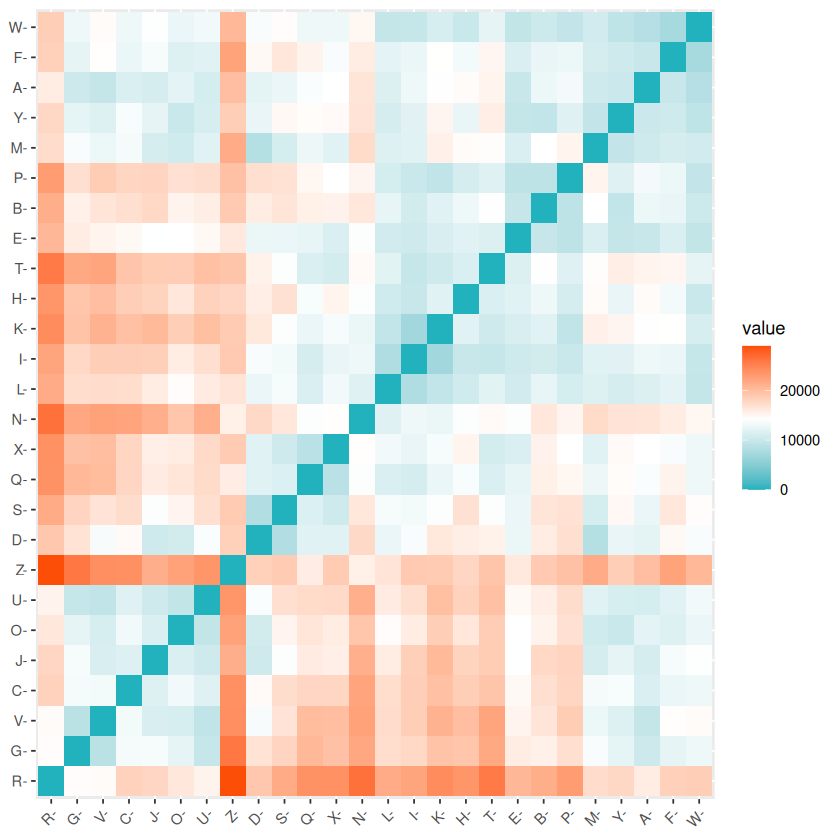

In [24]:
fviz_dist(min_dist, 
   gradient = list(low = "#00AFBB", mid = "white", high = "#FC4E07"))

#  Mantel test between eu_dist and man_dist

In [11]:
# Euclidean vs. Manhattan
mantel.rtest(eu_dist, man_dist, nrepet=1000)

Monte-Carlo test
Call: mantelnoneuclid(m1 = m1, m2 = m2, nrepet = nrepet)

Observation: 0.889386 

Based on 1000 replicates
Simulated p-value: 0.000999001 
Alternative hypothesis: greater 

     Std.Obs  Expectation     Variance 
 8.644516197 -0.004176166  0.010684844 

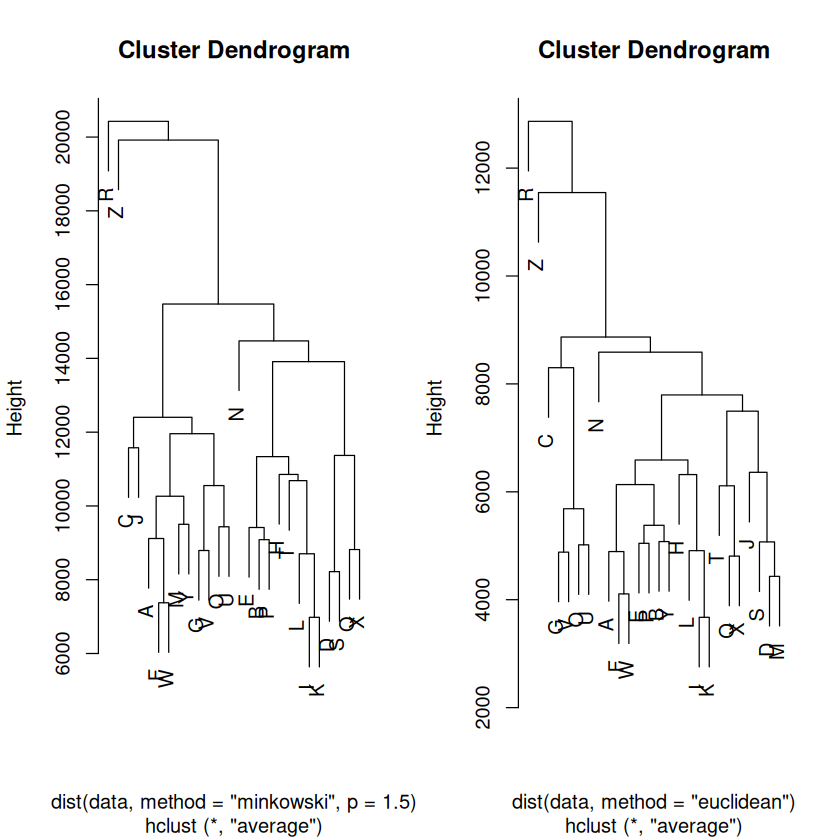

In [12]:
par(mfrow=c(1,2))
plot(hclust(dist(data, method="minkowski", p=1.5),method="average"))
plot(hclust(dist(data, method="euclidean"),method="average"))

# Distance matrix for binary data

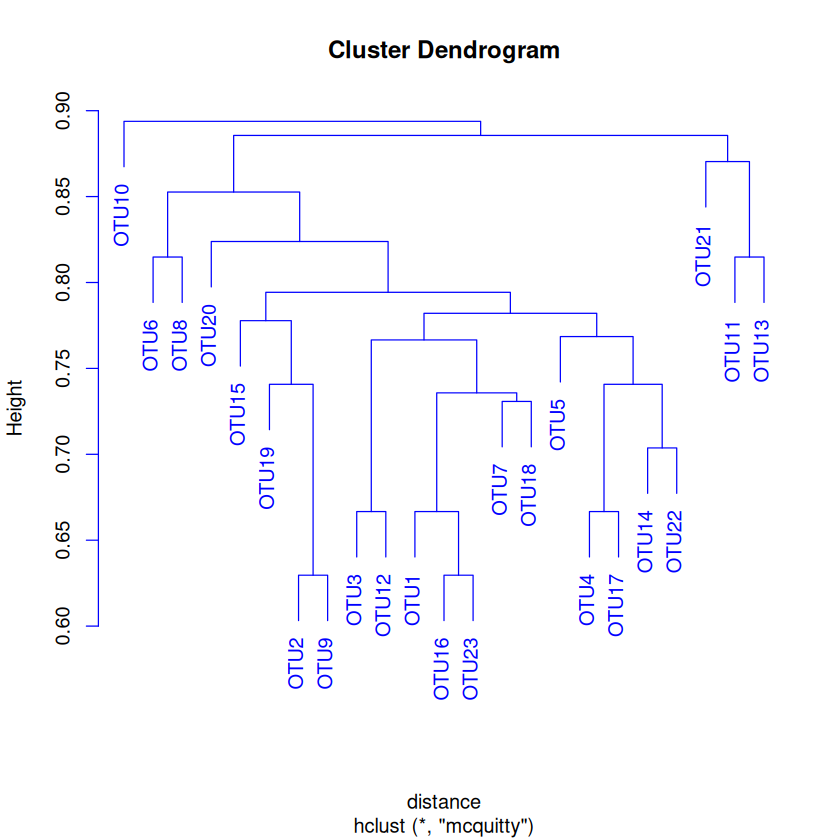

In [13]:
#example table of molecular markers
library(agricolae)
data(markers)
distance<-similarity(markers)
#startgraph
tree<-hclust(distance,method="mcquitty")
plot(tree,col="blue")

# Compute distance between two random DNA sequences

In [17]:
# Load necessary library
#if (!requireNamespace("Biostrings", quietly = TRUE)) {
 # install.packages("Biostrings", repos = "http://bioconductor.org/packages/release/bioc")
#}
library(Biostrings)
library(cultevo)
# Step 1: Generate synthetic data
set.seed(123) # For reproducibility
sequence_length <- 20

# Generate two random DNA sequences
seq1 <- paste(sample(c("A", "T", "C", "G"), sequence_length, replace = TRUE), collapse = "")
seq2 <- paste(sample(c("A", "T", "C", "G"), sequence_length, replace = TRUE), collapse = "")

# Print the sequences
cat("Sequence 1:", seq1, "\n")
cat("Sequence 2:", seq2, "\n")

# Step 2: Define a function to calculate the Hamming distance
hamming_distance <- function(seq1, seq2) {
  if (nchar(seq1) != nchar(seq2)) {
    stop("Sequences must be of equal length")
  }
  sum(strsplit(seq1, NULL)[[1]] != strsplit(seq2, NULL)[[1]])
}

# Step 3: Calculate the Hamming distance between the two sequences
distance <- hamming_distance(seq1, seq2)

# Print the Hamming distance
cat("Hamming Distance:", distance, "\n")


Sequence 1: CCCTCTTTCAGTTATCGACC 
Sequence 2: AGAAACGTCTATCGTACCAG 
Hamming Distance: 16 
